In [29]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np 
import sklearn
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

df = pd.read_csv("SDSS-DR14.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [2]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


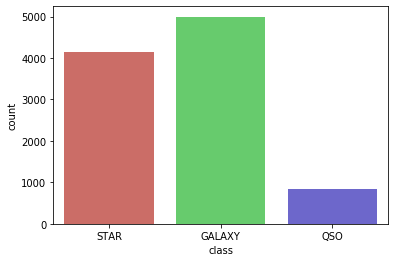

In [4]:
#cantidad demasiado pequeña de quasar
sb.countplot(x='class',data=df, palette='hls')

In [5]:
#la media de objid y rerun son iguales a los valores visibles desde el dataframe por lo que podemos sospechar
#que son valores que se repetiran en todo el dataframe
df.mean()

objid        1.237650e+18
ra           1.755300e+02
dec          1.483615e+01
u            1.861936e+01
g            1.737193e+01
r            1.684096e+01
i            1.658358e+01
z            1.642283e+01
run          9.810348e+02
rerun        3.010000e+02
camcol       3.648700e+00
field        3.023801e+02
specobjid    1.645022e+18
redshift     1.437257e-01
plate        1.460986e+03
mjd          5.294353e+04
fiberid      3.530694e+02
dtype: float64

In [6]:
#valores inservibles: objid, rerun 
df_unique = pd.unique(df[['rerun','objid']].values.ravel('K'))
df_counts = df.groupby(['rerun','objid']).count()
print(df_counts)
print("\n",df_unique)

                       ra    dec      u      g      r      i      z    run  \
rerun objid                                                                  
301   1.237650e+18  10000  10000  10000  10000  10000  10000  10000  10000   

                    camcol  field  specobjid  class  redshift  plate    mjd  \
rerun objid                                                                   
301   1.237650e+18   10000  10000      10000  10000     10000  10000  10000   

                    fiberid  
rerun objid                  
301   1.237650e+18    10000  

 [3.01000e+02 1.23765e+18]


In [7]:
#eliminamos las columnas objid, rerun y class
df_drop = df.drop(['objid','rerun','class'], axis=1)
print(df_drop)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field  

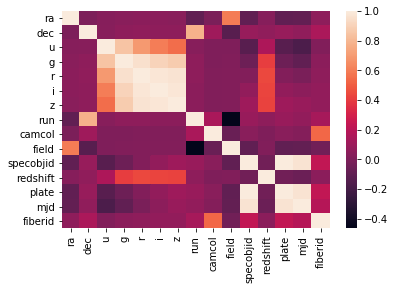

In [8]:
corr = df_drop.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

In [9]:
#Dividir variables independientes y dependientes
X = df[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'specobjid',
 'redshift', 'plate', 'mjd', 'fiberid']]
y = df['class']
print(y)
print(X)

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: class, Length: 10000, dtype: object
              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9997  131.552562  51.666986  18.75818  17.77784  17.51872  17.43

In [10]:
#Divido mis datos en df_train y df_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)
print(y_test)
y_train.value_counts()

              ra        dec         u         g         r         i         z  \
3555  173.573276  -0.518473  19.49648  19.36368  19.29852  19.11845  19.08193   
4078  167.449438  -0.204307  19.27516  17.93593  17.16087  16.72539  16.46638   
8445   14.399753  14.601499  17.32164  15.94063  15.26906  14.85143  14.59428   
5939  182.372733  -0.860851  19.56933  18.65260  18.45110  18.37256  18.30464   
5583  142.134485  58.409548  19.04761  18.15117  17.83382  17.69068  17.64062   
...          ...        ...       ...       ...       ...       ...       ...   
3341  227.375806  -0.771168  16.99624  15.53884  14.83586  14.42628  14.12664   
4876  179.919959  -0.534320  18.82454  18.26074  17.93938  17.70602  17.46235   
8343  240.641309  52.250872  16.71322  15.25464  14.72938  14.56272  14.50999   
7913  162.119589   0.660777  19.51074  17.67424  16.77590  16.36040  16.06209   
2190   27.475474  13.126662  19.00817  17.13766  16.36818  15.99174  15.71176   

       run  camcol  field  

GALAXY    3545
STAR      2852
QSO        603
Name: class, dtype: int64

In [11]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
df_over=pd.concat([X_over,y_over])
y_over

0          QSO
1          QSO
2       GALAXY
3       GALAXY
4         STAR
         ...  
9937       QSO
9938       QSO
9939       QSO
9940       QSO
9941       QSO
Name: class, Length: 9942, dtype: object

In [12]:
#verificar cantidad de datos
y_over.value_counts()

QSO       3545
GALAXY    3545
STAR      2852
Name: class, dtype: int64

In [13]:
#comparar los datos
df_over.describe()

,camcol,dec,fiberid,field,g,i,mjd,plate,r,ra,redshift,run,specobjid,u,z
count,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9942.000000,9.942000e+03,9942.000000,9942.000000
mean,3.673607,16.640024,362.472742,305.549286,17.767490,17.118316,52864.536311,1405.540435,17.340123,176.370761,0.467938,997.580064,1.582598e+18,18.720728,16.981883
std,1.667510,26.260674,207.338009,163.091559,1.039752,1.309299,1532.403613,1862.923269,1.222868,47.381307,0.710924,276.130725,2.097480e+18,0.761472,1.384393
min,1.000000,-5.382632,1.000000,11.000000,12.799550,11.947210,51608.000000,266.000000,12.431600,8.235100,-0.004136,308.000000,2.995830e+17,12.988970,11.610410
25%,2.000000,-0.516491,199.000000,183.000000,17.127297,16.133055,51900.000000,298.000000,16.476307,156.380032,0.000403,756.000000,3.356348e+17,18.358510,15.914985
50%,4.000000,0.471853,360.000000,300.000000,17.853935,17.104230,51990.000000,436.000000,17.372135,181.137522,0.083412,756.000000,4.910325e+17,18.938120,16.967060
75%,5.000000,46.867762,517.000000,419.000000,18.576240,18.297390,54208.000000,2558.000000,18.386520,203.797955,0.772505,1334.000000,2.880110e+18,19.300235,18.200680
max,6.000000,68.542265,1000.000000,768.000000,19.918970,24.361810,57481.000000,8410.000000,24.802040,260.884382,5.353854,1412.000000,9.468830e+18,19.599900,22.833060


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f586019b050>,
      dtype=object)

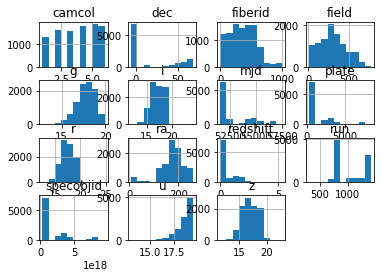

In [14]:
df_over.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f585d871710>,
      dtype=object)

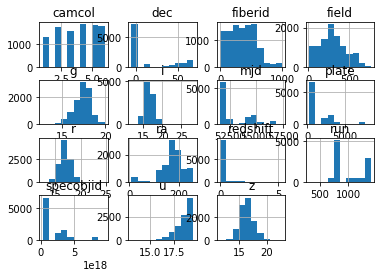

In [15]:
df.describe()
df_drop.hist()

In [21]:
#primer clasificador KNeighbors
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_over, y_over)

y_pred = neigh.predict(X_test)


In [22]:
#Matriz de confusión para evaluar rendimiento
confusion_matrix1 = confusion_matrix(y_test, y_pred)
confusion_matrix1


array([[1021,  378,   54],
       [ 127,   85,   35],
       [ 198,  168,  934]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.76      0.70      0.73      1453
         QSO       0.13      0.34      0.19       247
        STAR       0.91      0.72      0.80      1300

    accuracy                           0.68      3000
   macro avg       0.60      0.59      0.58      3000
weighted avg       0.77      0.68      0.72      3000



In [24]:
#Probando el entrenamiento sin balanceo de datos
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred2 = neigh.predict(X_test)

In [25]:
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
print(classification_report(y_test, y_pred2))
confusion_matrix2

              precision    recall  f1-score   support

      GALAXY       0.74      0.94      0.83      1453
         QSO       0.20      0.04      0.07       247
        STAR       0.90      0.76      0.83      1300

    accuracy                           0.79      3000
   macro avg       0.61      0.58      0.57      3000
weighted avg       0.76      0.79      0.76      3000



array([[1360,   29,   64],
       [ 187,   11,   49],
       [ 293,   14,  993]])

In [34]:
#Probando el segundo método: SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_over, y_over)
y_pred3 = clf.predict(X_test)

In [35]:
#Matriz de confusión metodo 2
confusion_matrix3 = confusion_matrix(y_test, y_pred3)
print(classification_report(y_test, y_pred3))
confusion_matrix3

              precision    recall  f1-score   support

      GALAXY       0.91      0.97      0.94      1453
         QSO       0.96      0.93      0.94       247
        STAR       0.97      0.90      0.93      1300

    accuracy                           0.94      3000
   macro avg       0.94      0.93      0.94      3000
weighted avg       0.94      0.94      0.93      3000



array([[1410,    6,   37],
       [  14,  229,    4],
       [ 130,    4, 1166]])

In [36]:
#Método 3: Random Forest
clf_m3 = RandomForestClassifier(max_depth=2, random_state=0)
clf_m3.fit(X_over, y_over)
y_pred4 = clf_m3.predict(X_test)

In [37]:
#Matriz de confusión metodo 3
confusion_matrix4 = confusion_matrix(y_test, y_pred4)
print(classification_report(y_test, y_pred4))
confusion_matrix4

              precision    recall  f1-score   support

      GALAXY       0.83      0.96      0.89      1453
         QSO       0.67      0.84      0.74       247
        STAR       0.96      0.75      0.84      1300

    accuracy                           0.86      3000
   macro avg       0.82      0.85      0.83      3000
weighted avg       0.87      0.86      0.86      3000



array([[1396,   25,   32],
       [  32,  207,    8],
       [ 252,   77,  971]])

### Comparación de rendimientos:

Claramente podemos observar que el método que mejor predijo los resultados fue el segundo método, el SVC (Support Vector Classification) y el peor fue el primero (KNeighbors) que obtuvo incluso peores resultados que los datos originales sin balancear.

#### Ventajas y desventajas: 
##### K-Neighbors:

Ventajas: Es un método simple y bastante fácil de entender, además es bastante robusto y a veces preciso, aunque no es competitivo en comparación a otros métodos.
Desventajas: Requisito de memoria alta. Además por lo que investigué el algoritmo no aprende explícitamente un modelo, en su lugar, elige memorizar las instancias de capacitación que se utilizan posteriormente como conocimiento para la fase de predicción.

##### SVC

Ventajas: Puede separar de manera óptima las diferentes características posicionandolas en un hiperplano, son muy útiles con una cantidad de datos no tan grande

###### Random forest

Ventajas: Es bastante certero en sus predicciones y se puede utilizar con grandes volumenes de datos
Desventajas: Puede caer en sobreajustes con datos ruidosos, es más complejo de interpretar por las personas en comparación a los árboles.


In [39]:
#Obtener la importancia de cada característica gracias al random  forest
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_over, y_over)
print(model.feature_importances_)

[0.01159687 0.01591997 0.03966846 0.08385275 0.07431985 0.09071974
 0.10002341 0.01042946 0.00771466 0.01132619 0.08699038 0.2857719
 0.08661404 0.08301907 0.01203325]


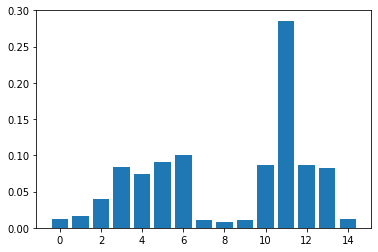

[0.011596873433777775,
 0.015919974209034283,
 0.039668456618457325,
 0.08385274858428804,
 0.07431984535783999,
 0.09071973515372198,
 0.1000234056854556,
 0.010429461931824676,
 0.007714661698954292,
 0.01132619123306976,
 0.0869903807877961,
 0.28577190007017,
 0.08661404275387846,
 0.08301906905496491,
 0.012033253426766744]

In [42]:
#graficamos lo anterior
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
list(model.feature_importances_)

Podemos observar que la característica "run" es la más significativa y la "r" la menos